In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.ensemble
import numpy as np
from fbprophet import Prophet
import seaborn

In [130]:
df = pd.read_csv('beijing3.csv', index_col=0)

In [131]:
df.isnull().sum()

year          0
month         0
day           0
hour          0
pm2.5         0
DEWP          0
TEMP          0
PRES          0
cbwd          0
Iws           0
Is            0
Ir            0
cars          0
average_pm    0
dtype: int64

In [132]:
df.shape

(41756, 14)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41756 entries, 25 to 43823
Data columns (total 14 columns):
year          41756 non-null int64
month         41756 non-null int64
day           41756 non-null int64
hour          41756 non-null int64
pm2.5         41756 non-null float64
DEWP          41756 non-null int64
TEMP          41756 non-null float64
PRES          41756 non-null float64
cbwd          41756 non-null object
Iws           41756 non-null float64
Is            41756 non-null int64
Ir            41756 non-null int64
cars          41756 non-null float64
average_pm    41756 non-null float64
dtypes: float64(6), int64(7), object(1)
memory usage: 4.8+ MB


In [134]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


In [135]:
columns = ['date', 'year', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'cars', 'average_pm']

In [136]:
df[columns].tail()

,date,year,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cars,average_pm
43819,2014-12-31,2014,8.0,-23,-2.0,1034.0,NW,231.97,0,0,5300000.0,9.0
43820,2014-12-31,2014,10.0,-22,-3.0,1034.0,NW,237.78,0,0,5300000.0,9.0
43821,2014-12-31,2014,10.0,-22,-3.0,1034.0,NW,242.70,0,0,5300000.0,10.0
43822,2014-12-31,2014,8.0,-22,-4.0,1034.0,NW,246.72,0,0,5300000.0,9.0
43823,2014-12-31,2014,12.0,-21,-3.0,1034.0,NW,249.85,0,0,5300000.0,10.0


In [137]:
df = df.rename(columns={'pm2.5': 'y', 'date': 'ds'})

In [138]:
columns = ['ds', 'y']

In [139]:
df = df[columns1]

In [140]:
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41756 entries, 25 to 43823
Data columns (total 2 columns):
ds    41756 non-null datetime64[ns]
y     41756 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 978.7 KB


In [141]:
#df1['y_org'] = df1['y']

In [142]:
#df1['y'] = np.log(df1['y'])

In [143]:
#model = Prophet(daily_seasonality=True)
#model.fit(df1)


#df1.info()

### Time Series Analysis - Beijing Polution

In [144]:
# Fit a time series model
m = Prophet(daily_seasonality=True)
m.fit(df);

/anaconda3/envs/DataScience/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [125]:
#Predict future time series
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
41841,2015-03-27
41842,2015-03-28
41843,2015-03-29
41844,2015-03-30
41845,2015-03-31


In [126]:
# Attach predicted values - yhat
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

TypeError: incompatible type [object] for a datetime/timedelta operation

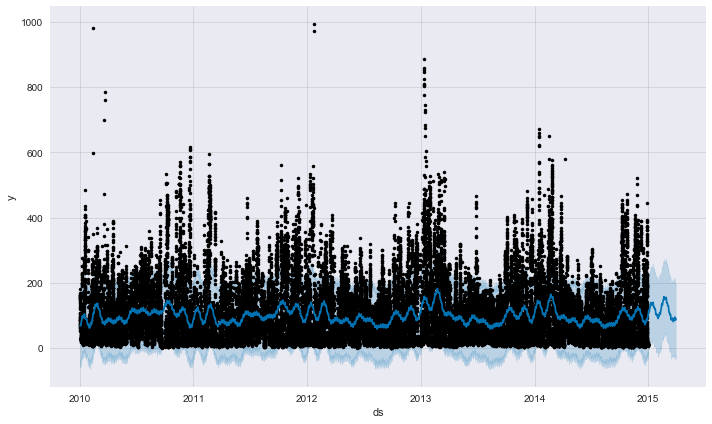

In [42]:
# Plot the forecasted values

m.plot(forecast);

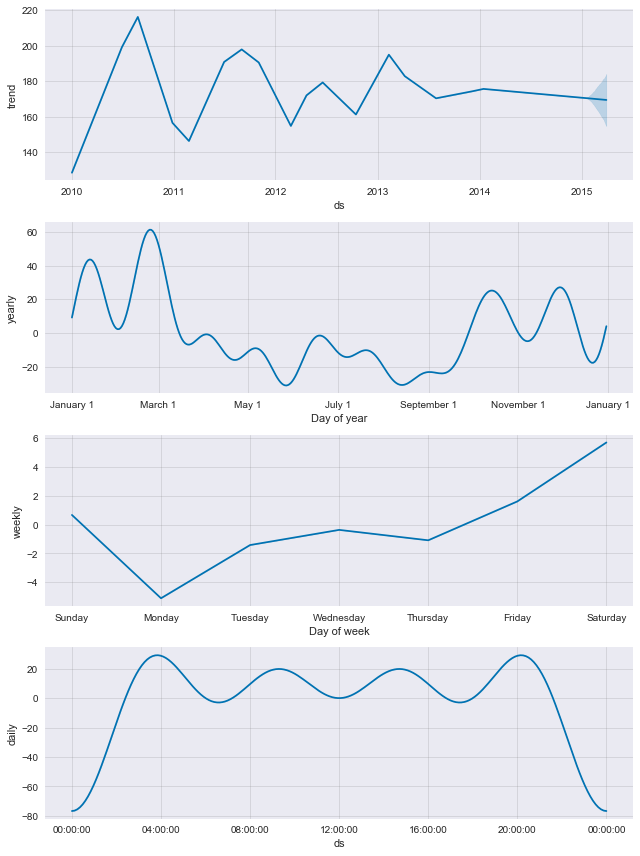

In [43]:
# Time Series Decomposition
m.plot_components(forecast);